In [7]:
import csv
import random

# Define header
header = ['hours_studied', 'attendance', 'grade']

# Open CSV file for writing
with open('student_data.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)

    for _ in range(500):
        hours_studied = round(random.uniform(0, 10), 2)       # Hours studied between 0 and 10
        attendance = round(random.uniform(50, 100), 2)        # Attendance % between 50 and 100
        # Generate grade roughly correlated to inputs + some noise
        grade = round(5 * hours_studied + 0.3 * attendance + random.gauss(0, 5), 2)
        grade = max(0, min(100, grade))  # Keep grade between 0 and 100

        writer.writerow([hours_studied, attendance, grade])

print("CSV file 'student_data.csv' created with 500 rows.")


CSV file 'student_data.csv' created with 500 rows.


<br><br>
<br><br>

In [17]:
import torch
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# === Load data from CSV ===
data = pd.read_csv('student_data.csv')

# Split inputs and target
X = data[['hours_studied', 'attendance']].values
y = data[['grade']].values

# === Scale features and targets ===
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_scaled, dtype=torch.float32)

# === Define model ===
model = nn.Linear(2, 1)

# === Loss & Optimizer ===
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# === Train/Test split ===
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# === Training loop ===
epochs = 1000
print("=== Training the Model ===")
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    predictions = model(X_train)
    loss = criterion(predictions, y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0 or epoch == 0:
        weights = model.weight.data.numpy()
        bias = model.bias.data.numpy()
        print(f"Epoch {epoch + 1}, Loss: {loss.item():.4f}")
        print(f"  Weights: {weights.flatten()}")
        print(f"  Bias: {bias[0]:.4f} \n")

# Final parameters after training
weights = model.weight.data.numpy()
bias = model.bias.data.numpy()
print("\n=== Final Model Parameters ===")
print(f"Weights: {weights.flatten()}")
print(f"Bias: {bias[0]:.4f} \n")

# === Evaluation on test set ===
model.eval()
with torch.no_grad():
    test_preds = model(X_test)
    test_loss = criterion(test_preds, y_test)
    print(f"\nTest Loss: {test_loss.item():.4f}")

# === User input for prediction ===
print("\n=== Predict Student Grade ===")
while True:
    try:
        user_input = input("Enter hours studied and attendance separated by comma (or 'exit'): ")
        if user_input.lower() == 'exit':
            break
        hours, attendance = map(float, user_input.split(','))
        # Scale inputs using scaler_X
        input_scaled = scaler_X.transform([[hours, attendance]])
        input_tensor = torch.tensor(input_scaled, dtype=torch.float32)
        model.eval()
        with torch.no_grad():
            pred_scaled = model(input_tensor).numpy()
        # Inverse scale to get actual grade prediction
        pred_grade = scaler_y.inverse_transform(pred_scaled)[0][0]
        print(f"Predicted Grade: {pred_grade:.2f}\n")
    except Exception:
        print("❌ Please enter two valid numbers separated by a comma, or 'exit'.\n")


=== Training the Model ===
Epoch 1, Loss: 2.0651
  Weights: [-0.25987378 -0.5549324 ]
  Bias: -0.0894 

Epoch 10, Loss: 1.7328
  Weights: [-0.17016907 -0.46537024]
  Bias: -0.0047 

Epoch 20, Loss: 1.4187
  Weights: [-0.07210447 -0.3683085 ]
  Bias: 0.0490 

Epoch 30, Loss: 1.1500
  Weights: [ 0.02295576 -0.27606043]
  Bias: 0.0402 

Epoch 40, Loss: 0.9249
  Weights: [ 0.11402079 -0.1905458 ]
  Bias: 0.0148 

Epoch 50, Loss: 0.7411
  Weights: [ 0.20040381 -0.11308092]
  Bias: 0.0107 

Epoch 60, Loss: 0.5932
  Weights: [ 0.28161123 -0.04436875]
  Bias: 0.0183 

Epoch 70, Loss: 0.4762
  Weights: [0.35732064 0.0153615 ]
  Bias: 0.0177 

Epoch 80, Loss: 0.3850
  Weights: [0.4273638  0.06623089]
  Bias: 0.0126 

Epoch 90, Loss: 0.3148
  Weights: [0.4916654  0.10866914]
  Bias: 0.0113 

Epoch 100, Loss: 0.2614
  Weights: [0.5502082 0.1433681]
  Bias: 0.0111 

Epoch 110, Loss: 0.2213
  Weights: [0.6030457  0.17119117]
  Bias: 0.0092 

Epoch 120, Loss: 0.1915
  Weights: [0.6503066  0.19308911]

KeyboardInterrupt: Interrupted by user

=== Training the Model ===
Epoch 1, Loss: 0.9424
Epoch 30, Loss: 0.2324
Epoch 60, Loss: 0.1588
Epoch 90, Loss: 0.1481
Epoch 120, Loss: 0.1392
Epoch 150, Loss: 0.1352
Epoch 180, Loss: 0.1299
Epoch 210, Loss: 0.1252
Epoch 240, Loss: 0.1351
Epoch 270, Loss: 0.1231
Epoch 300, Loss: 0.1268

=== Final Model Parameters (Last Layer) ===
Weights: [-0.12190343  0.18588343  0.21356678  0.171391   -0.05060407  0.05984334
  0.1488466   0.12964067 -0.13343626  0.08889481 -0.15203227  0.07296142
 -0.21256062 -0.04826372 -0.05353255 -0.13730092 -0.12335401 -0.06848837
 -0.10674679 -0.05510605 -0.18099833 -0.07431735  0.1264046  -0.2685367
  0.04919676  0.12259004 -0.1492388   0.01560216 -0.05382204 -0.08845717
  0.17711511  0.1867157 ]
Bias: 0.0584


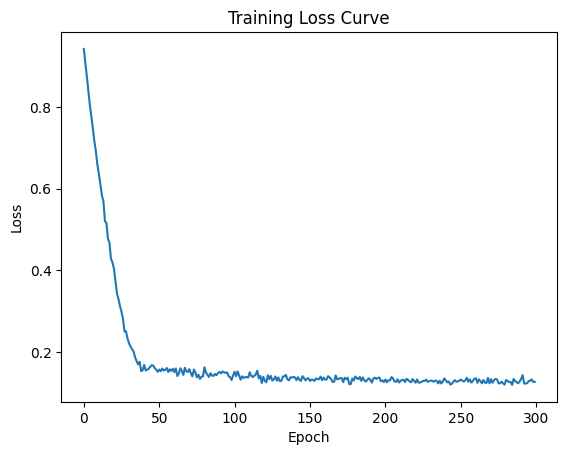


Test Loss: 0.1309

=== Predict Student Grade ===
Enter hours studied and attendance separated by comma (or 'exit'): 7.80
❌ Please enter two valid numbers separated by a comma, or 'exit'.

Enter hours studied and attendance separated by comma (or 'exit'):  7,80
Predicted Grade: 59.54%



KeyboardInterrupt: Interrupted by user

In [16]:
import torch
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Split inputs and target
X = data[['hours_studied', 'attendance']].values
y = data[['grade']].values

# === Scale features and targets ===
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_scaled, dtype=torch.float32)

# === Define deeper model ===
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

model = Net()

# === Loss & Optimizer ===
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# === Train/Test split ===
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# === Training loop ===
epochs = 300
train_losses = []

print("=== Training the Model ===")
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    predictions = model(X_train)
    loss = criterion(predictions, y_train)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    if (epoch + 1) % 30 == 0 or epoch == 0:
        print(f"Epoch {epoch + 1}, Loss: {loss.item():.4f}")

# Print final weights and bias of last layer
last_layer = list(model.net.children())[-1]
weights = last_layer.weight.data.numpy()
bias = last_layer.bias.data.numpy()
print("\n=== Final Model Parameters (Last Layer) ===")
print(f"Weights: {weights.flatten()}")
print(f"Bias: {bias[0]:.4f}")

# === Plot training loss curve ===
plt.plot(train_losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

# === Evaluation on test set ===
model.eval()
with torch.no_grad():
    test_preds = model(X_test)
    test_loss = criterion(test_preds, y_test)
    print(f"\nTest Loss: {test_loss.item():.4f}")

# === User input for prediction ===
print("\n=== Predict Student Grade ===")
while True:
    try:
        user_input = input("Enter hours studied and attendance separated by comma (or 'exit'): ")
        if user_input.lower() == 'exit':
            break
        hours, attendance = map(float, user_input.split(','))
        # Scale inputs using scaler_X
        input_scaled = scaler_X.transform([[hours, attendance]])
        input_tensor = torch.tensor(input_scaled, dtype=torch.float32)
        model.eval()
        with torch.no_grad():
            pred_scaled = model(input_tensor).numpy()
        # Inverse scale to get actual grade prediction
        pred_grade = scaler_y.inverse_transform(pred_scaled)[0][0]
        print(f"Predicted Grade: {pred_grade:.2f}%\n")
    except Exception:
        print("❌ Please enter two valid numbers separated by a comma, or 'exit'.\n")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')